In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from google.colab import files

# Завантажте файл
uploaded = files.upload()

# Отримайте шлях до завантаженого файлу
file_path = list(uploaded.keys())[0]

# Завантаження файлу у DataFrame
df = pd.read_csv(file_path, parse_dates=['ad_date'], infer_datetime_format=True)


Saving facebook_ads_data (1).csv to facebook_ads_data (1).csv


In [16]:
df.head()


,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   object        
 2   total_spend        1494 non-null   float64       
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   float64       
 6   cpc                1443 non-null   float64       
 7   cpm                1462 non-null   float64       
 8   ctr                1462 non-null   float64       
 9   romi               1462 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 116.8+ KB


In [18]:
# Перетворення стовпця з датою в datetime
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')

# Згрупуйте дані за день і підрахуйте сумарні значення
grouped_data = df.groupby('ad_date').sum().reset_index()


<ipython-input-18-c7a070f76a21>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('ad_date').sum().reset_index()


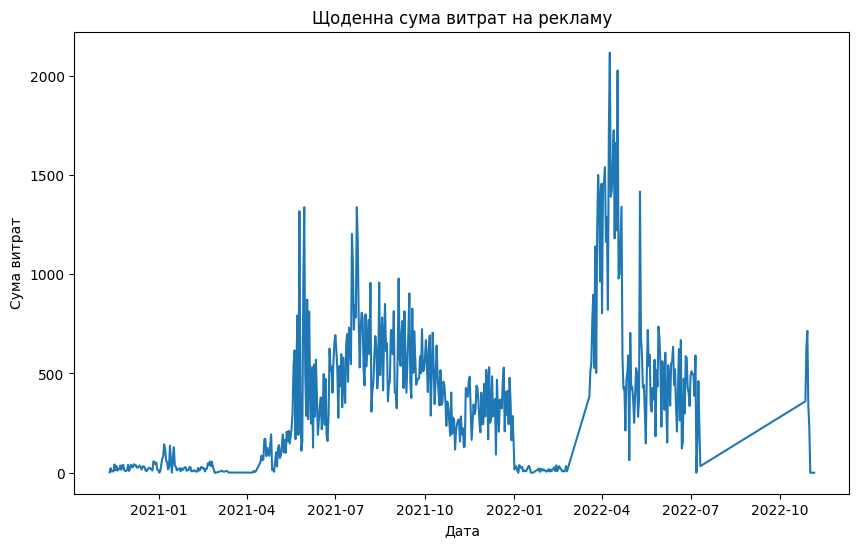

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['ad_date'], grouped_data['total_spend'])
plt.title('Щоденна сума витрат на рекламу')
plt.xlabel('Дата')
plt.ylabel('Сума витрат')
plt.show()


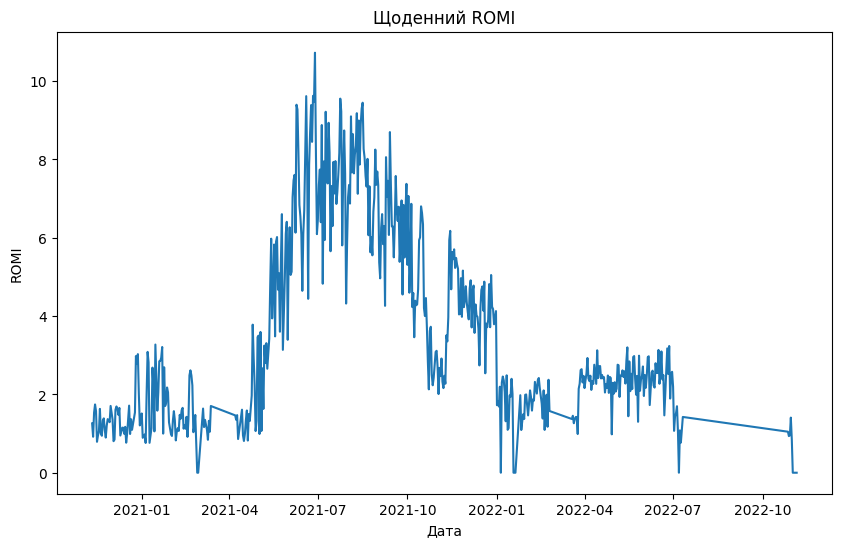

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['ad_date'], grouped_data['romi'])
plt.title('Щоденний ROMI')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.show()

<ipython-input-22-c24fc3f44d4e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_campaign = df.groupby('campaign_name').sum().reset_index()


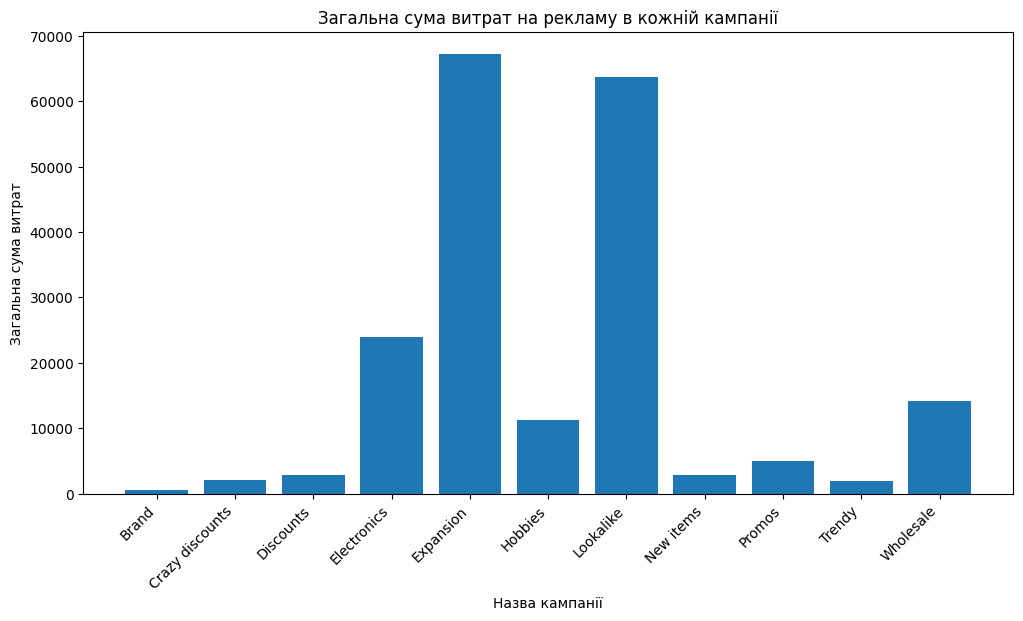

In [22]:
# Згрупувати дані за назвою кампанії
grouped_campaign = df.groupby('campaign_name').sum().reset_index()

# Побудова графіка загальної суми витрат на рекламу в кожній з кампаній
plt.figure(figsize=(12, 6))
plt.bar(grouped_campaign['campaign_name'], grouped_campaign['total_spend'])
plt.title('Загальна сума витрат на рекламу в кожній кампанії')
plt.xlabel('Назва кампанії')
plt.ylabel('Загальна сума витрат')
plt.xticks(rotation=45, ha='right')
plt.show()

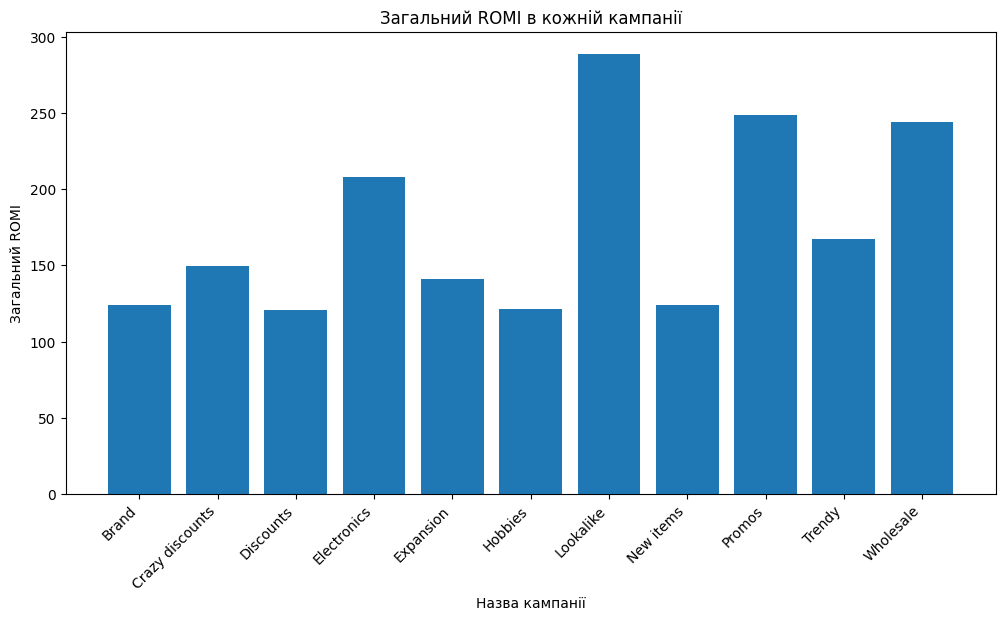

In [23]:
# Побудова графіка загального ROMI в кожній з кампаній
plt.figure(figsize=(12, 6))
plt.bar(grouped_campaign['campaign_name'], grouped_campaign['romi'])
plt.title('Загальний ROMI в кожній кампанії')
plt.xlabel('Назва кампанії')
plt.ylabel('Загальний ROMI')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
import seaborn as sns

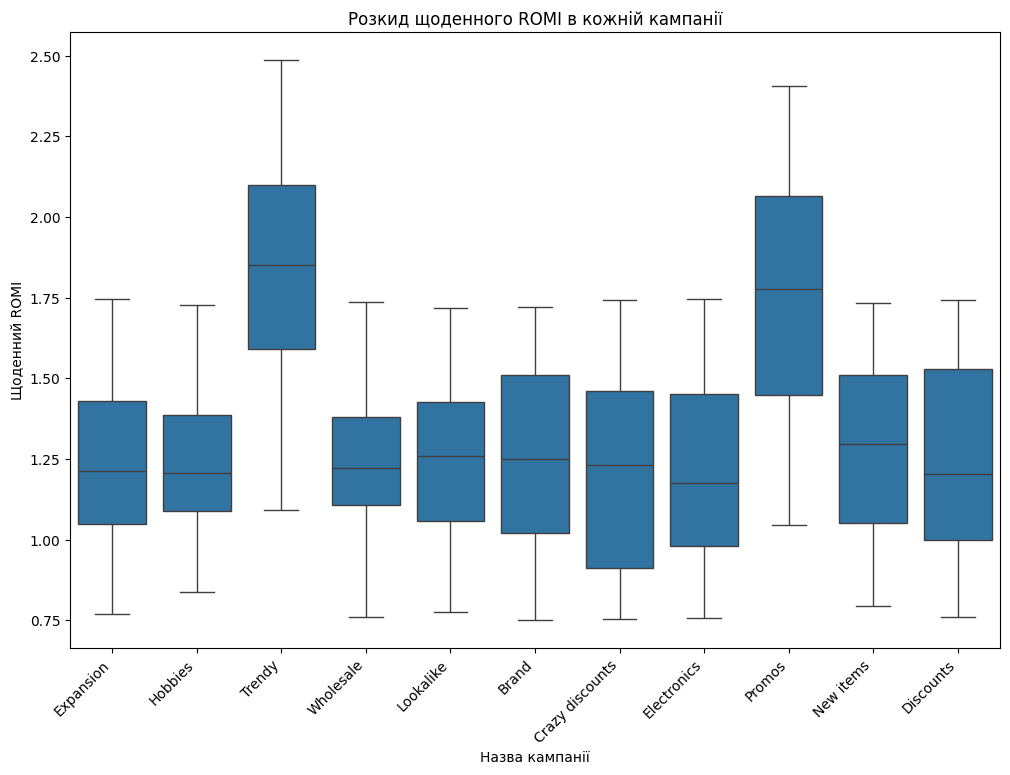

In [28]:
# Застосування групування та побудова box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='campaign_name', y='romi', data=df)
plt.title('Розкид щоденного ROMI в кожній кампанії')
plt.xlabel('Назва кампанії')
plt.ylabel('Щоденний ROMI')
plt.xticks(rotation=45, ha='right')
plt.show()

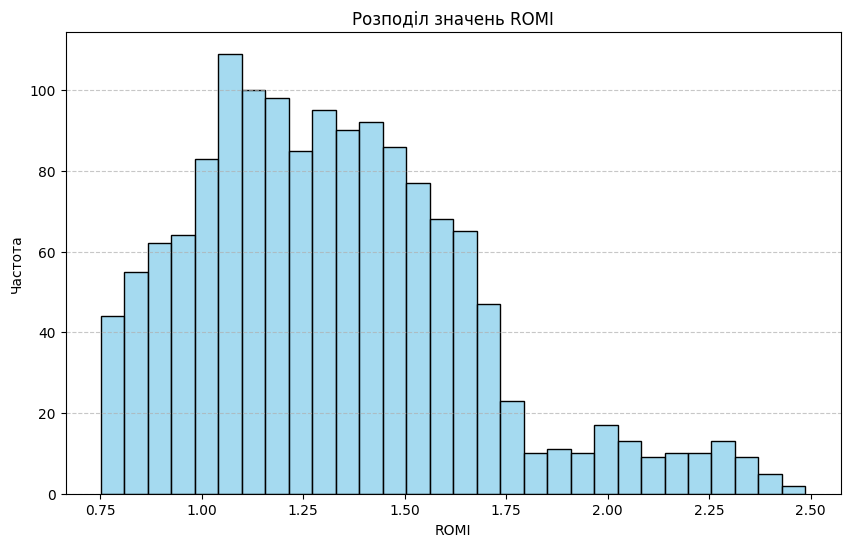

In [29]:
# Відображення гістограми ROMI за допомогою seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='romi', bins=30, color='skyblue', edgecolor='black')
plt.title('Розподіл значень ROMI')
plt.xlabel('ROMI')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Вибірка тільки числових стовпців для кореляції
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

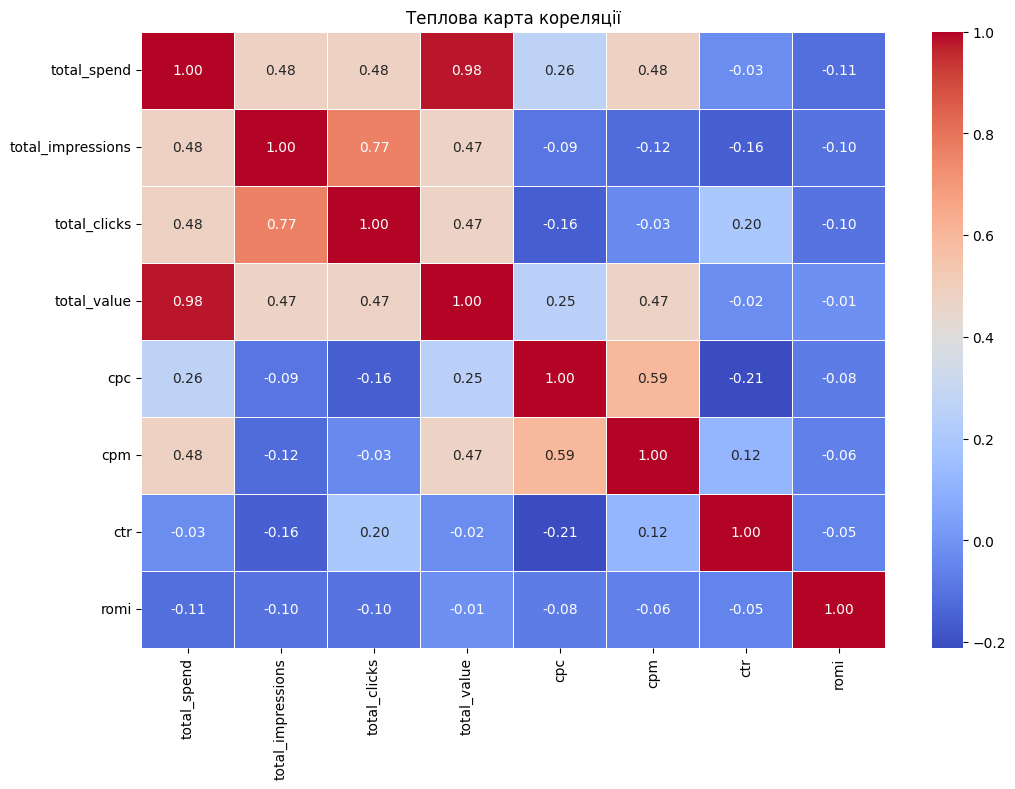

In [32]:
# Побудова теплової карти кореляції
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляції')
plt.show()

In [33]:
# Знайдення показників з найвищою та найнижчою кореляцією з "total_value"
total_value_correlation = correlation_matrix['total_value'].sort_values(ascending=False)
highest_correlation = total_value_correlation[1]  # Найвища кореляція (індекс 1, оскільки нульовий елемент - кореляція з самим собою)
lowest_correlation = total_value_correlation[-1]  # Найнижча кореляція

In [34]:
print(f'Показники з найвищою кореляцією:\n{highest_correlation}\n\n')

Показники з найвищою кореляцією:
0.978889925874156




In [35]:
print(f'Показники з найнижчою кореляцією:\n{lowest_correlation}')

Показники з найнижчою кореляцією:
-0.022267180843907122


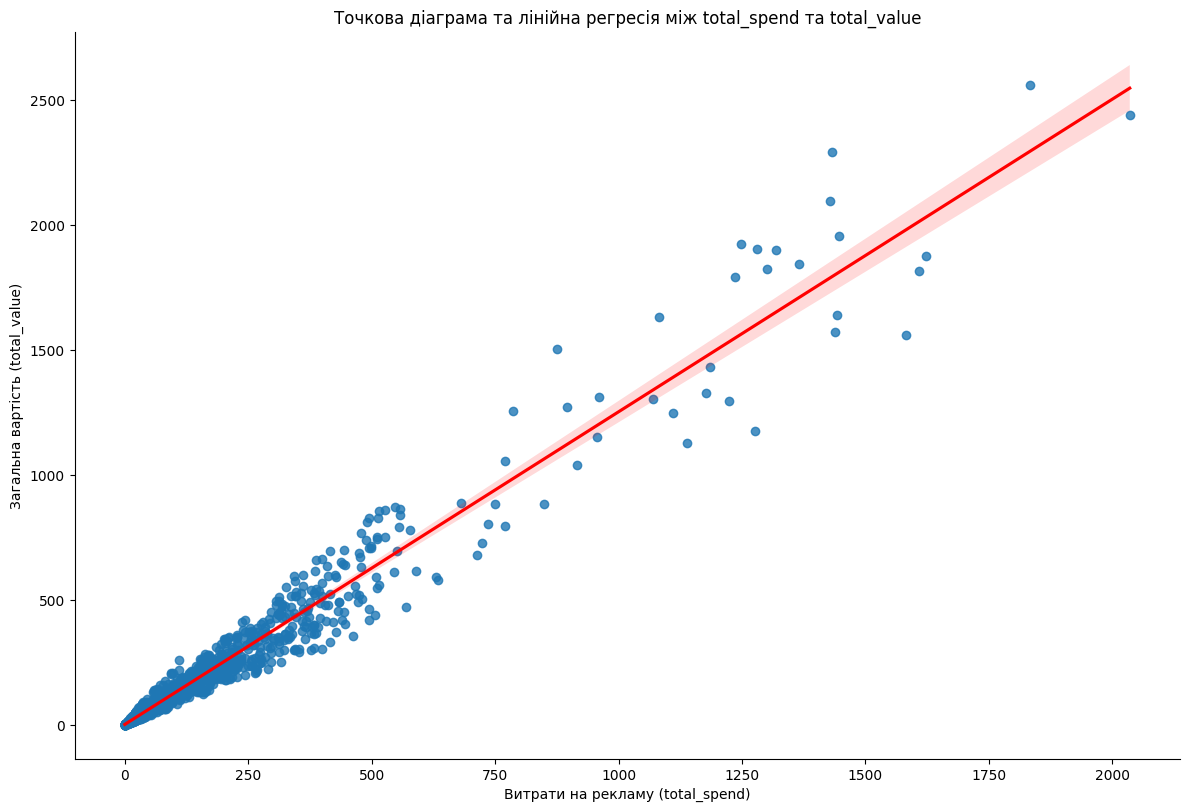

In [36]:
# Побудова точкової діаграми з лінійною регресією
sns.lmplot(x='total_spend', y='total_value', data=df, height=8, aspect=1.5, line_kws={'color': 'red'})
plt.title('Точкова діаграма та лінійна регресія між total_spend та total_value')
plt.xlabel('Витрати на рекламу (total_spend)')
plt.ylabel('Загальна вартість (total_value)')
plt.show()